In [84]:
from PIL import Image,ImageEnhance
import numpy as np
from google.colab.patches import cv2_imshow

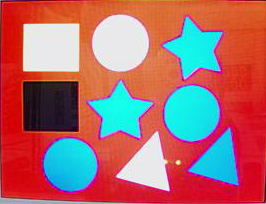

In [85]:
img = Image.open('/content/Untitled.jpg')
img

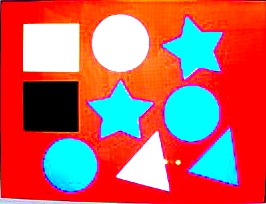

In [86]:
contrast = ImageEnhance.Contrast(img)
img = contrast.enhance(2)
img

In [87]:
img.save('/content/test.jpg')

start to detect lines...



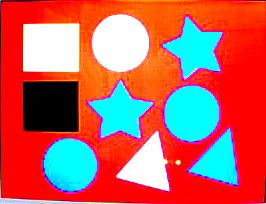

周长: 936.527, 面积: 53308.500 颜色: (255, 214, 63) 形状: 矩形 


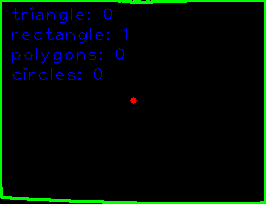

{'circles': 0, 'polygons': 0, 'rectangle': 1, 'triangle': 0}

In [88]:
####################################################
#   作者:zhigang,
####################################################
import cv2 as cv
import numpy as np

class ShapeAnalysis:
    def __init__(self):
        self.shapes = {'triangle': 0, 'rectangle': 0, 'polygons': 0, 'circles': 0}

    def analysis(self, frame):
        h, w, ch = frame.shape
        result = np.zeros((h, w, ch), dtype=np.uint8)
        # 二值化图像
        print("start to detect lines...\n")
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        ret, binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
        cv2_imshow(frame)

        contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        for cnt in range(len(contours)):
            # 提取与绘制轮廓
            cv.drawContours(result, contours, cnt, (0, 255, 0), 2)

            # 轮廓逼近
            epsilon = 0.01 * cv.arcLength(contours[cnt], True)
            approx = cv.approxPolyDP(contours[cnt], epsilon, True)

            # 分析几何形状
            corners = len(approx)
            shape_type = ""
            if corners == 3:
                count = self.shapes['triangle']
                count = count+1
                self.shapes['triangle'] = count
                shape_type = "三角形"
            if corners == 4:
                count = self.shapes['rectangle']
                count = count + 1
                self.shapes['rectangle'] = count
                shape_type = "矩形"
            if corners >= 10:
                count = self.shapes['circles']
                count = count + 1
                self.shapes['circles'] = count
                shape_type = "圆形"
            if 4 < corners < 10:
                count = self.shapes['polygons']
                count = count + 1
                self.shapes['polygons'] = count
                shape_type = "多边形"

            # 求解中心位置
            mm = cv.moments(contours[cnt])
            if mm['m00'] == 0:
              continue
            cx = int(mm['m10'] / mm['m00'])
            cy = int(mm['m01'] / mm['m00'])
            cv.circle(result, (cx, cy), 3, (0, 0, 255), -1)

            # 颜色分析
            color = frame[cy][cx]
            color_str = "(" + str(color[0]) + ", " + str(color[1]) + ", " + str(color[2]) + ")"

            # 计算面积与周长
            p = cv.arcLength(contours[cnt], True)
            area = cv.contourArea(contours[cnt])
            print("周长: %.3f, 面积: %.3f 颜色: %s 形状: %s "% (p, area, color_str, shape_type))

        
        cv2_imshow(self.draw_text_info(result))
        # cv.imwrite("D:/test-result.png", self.draw_text_info(result))
        return self.shapes

    def draw_text_info(self, image):
        c1 = self.shapes['triangle']
        c2 = self.shapes['rectangle']
        c3 = self.shapes['polygons']
        c4 = self.shapes['circles']
        cv.putText(image, "triangle: "+str(c1), (10, 20), cv.FONT_HERSHEY_PLAIN, 1.2, (255, 0, 0), 1)
        cv.putText(image, "rectangle: " + str(c2), (10, 40), cv.FONT_HERSHEY_PLAIN, 1.2, (255, 0, 0), 1)
        cv.putText(image, "polygons: " + str(c3), (10, 60), cv.FONT_HERSHEY_PLAIN, 1.2, (255, 0, 0), 1)
        cv.putText(image, "circles: " + str(c4), (10, 80), cv.FONT_HERSHEY_PLAIN, 1.2, (255, 0, 0), 1)
        return image


src = cv.imread("/content/test.jpg")
ld = ShapeAnalysis()
ld.analysis(src)
# cv.waitKey(0)
# cv.destroyAllWindows()